In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
olympics = pd.read_csv('athlete_events.csv')

In [19]:
olympics = olympics.loc[olympics.Year >= 1994]

# Clean the Team column
# Some of the entries in the column contain the country name followed by a dash and a number, such as China-2.
pd.options.mode.chained_assignment = None
new_Team = [team[:-2] if team[-2] == '-' else team for team in olympics.Team]
olympics.Team = new_Team

top_countries = olympics.groupby('Team').Team.count().sort_values(ascending = False)[0:40,]

In [20]:
olympics = olympics.loc[olympics.Team.isin(top_countries.index)]

In [21]:
top_sports = olympics.groupby('Sport').Sport.count().sort_values(ascending=False)[0:40,]

In [22]:
olympics_top_sports = olympics.loc[olympics.Sport.isin(top_sports.index)]
olympics_our_sports = olympics[olympics.Sport.isin(['Swimming', 'Figure Skating', 'Table Tennis', 'Athletics'])]

In [29]:
medals_top_sports = olympics_top_sports.loc[pd.notnull(olympics_top_sports.Medal)].groupby(['Team','Sport']).Team.count().unstack().fillna(0)
medals_our_sports = olympics_our_sports.loc[pd.notnull(olympics_our_sports.Medal)].groupby(['Team','Sport']).Team.count().unstack().fillna(0)
medals_our_sports

Sport,Athletics,Figure Skating,Swimming,Table Tennis
Team,,,,
Argentina,0.0,0.0,1.0,0.0
Australia,20.0,0.0,220.0,0.0
Austria,2.0,0.0,3.0,0.0
Belarus,17.0,0.0,3.0,0.0
Belgium,6.0,0.0,2.0,0.0
Brazil,16.0,0.0,12.0,0.0
Bulgaria,3.0,0.0,0.0,0.0
Canada,19.0,22.0,23.0,0.0
China,21.0,12.0,53.0,65.0


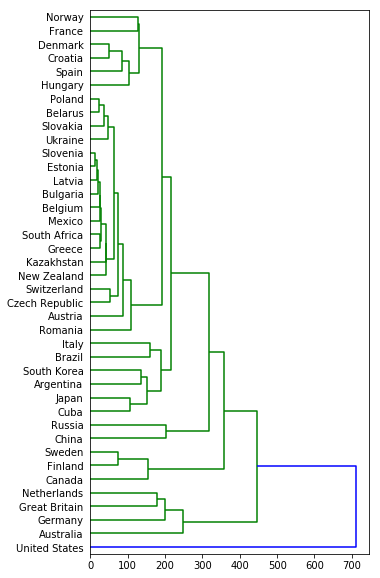

In [25]:
mergings_top_sports = linkage(medals_top_sports, method = 'ward')
plt.figure(figsize=(5,10))
dendrogram(mergings_top_sports, labels = medals_top_sports.index, leaf_rotation = 0, leaf_font_size = 10, orientation = 'right')
plt.show()

# This dendrogram shows how closely certain countries are related based on their performance in the most popular olympic sports. 
# Many small European countries are clustered together, such as Slovenia, Estonia, Latvia, and Bulgaria.
# As we move down the dendrogram, we get to larger countries that have won more medals, such as Germany, Australia, and USA. 

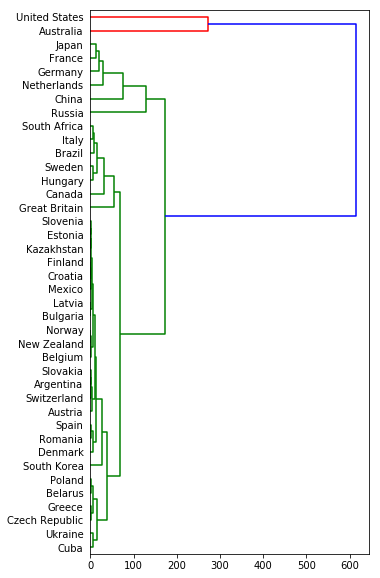

In [28]:
mergings_our_sports = linkage(medals_our_sports, method = 'ward')
plt.figure(figsize=(5,10))
dendrogram(mergings_our_sports, labels = medals_our_sports.index, leaf_rotation = 0, leaf_font_size = 10, orientation = 'right')
plt.show()

# If we only consider our four sports, a lot of countries will be extremely close to each other, simply because
# they've won very few medals in these sports. 
# For example, Argentina is represented by the point (0, 0, 1, 0), which means they have won 0 medals in 
# athletics, figure skating, and table tennis, but 1 medal in swimming.
# Switzerland is represented by the point (0, 1, 0, 0), which means they have won 0 medals in athletics,
# swimming, and table tennis, but 1 medal in figure skating.
# So, the distance between Argentina and Switzerland is extremely small, because the values of their coordinates
# are almost all 0, meaning they will cluster together immediately.